**Analyze stocks by group S&P 500**





In [ ]:
# Importing relevant modules:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import Request, urlopen 
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
from datetime import datetime, timedelta
import time
import calendar
from pandas_datareader import data,wb
from pandas.tseries.offsets import BQuarterBegin

Importing stocks by group from S&P 500:communication, consumer cyclical,healthcare and technology

In [ ]:
# Downloaded data for a stock
# Cleaned and explored the data

In [4]:
#check data
df_AAPL = pd.read_csv("AAPL.csv")

df_AAPL.info()
df_AAPL.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10382 entries, 0 to 10381
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10382 non-null  object 
 1   Low             10382 non-null  float64
 2   Open            10382 non-null  float64
 3   Volume          10382 non-null  int64  
 4   High            10382 non-null  float64
 5   Close           10382 non-null  float64
 6   Adjusted Close  10382 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 567.9+ KB


,Date,Low,Open,Volume,High,Close,Adjusted Close
10377,08-02-2022,171.429993,171.729996,74829200,175.350006,174.830002,174.830002
10378,09-02-2022,174.899994,176.050003,71285000,176.649994,176.279999,176.279999
10379,10-02-2022,171.550003,174.139999,90865900,175.479996,172.119995,172.119995
10380,11-02-2022,168.039993,172.330002,98566000,173.080002,168.639999,168.639999
10381,14-02-2022,167.139999,167.369995,33581666,169.320007,169.080002,169.080002


In [5]:
#convert 'Date' to format Date

df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'], format='%d-%m-%Y')
df_AAPL.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
10377,2022-02-08,171.429993,171.729996,74829200,175.350006,174.830002,174.830002
10378,2022-02-09,174.899994,176.050003,71285000,176.649994,176.279999,176.279999
10379,2022-02-10,171.550003,174.139999,90865900,175.479996,172.119995,172.119995
10380,2022-02-11,168.039993,172.330002,98566000,173.080002,168.639999,168.639999
10381,2022-02-14,167.139999,167.369995,33581666,169.320007,169.080002,169.080002


In [6]:
# Using plotly.express for Stocks AAPL

fig = px.line(df_AAPL, x='Date', y='Close',title='Close Stock price AAPL  by date')

fig.update_xaxes(rangeslider_visible=True)


plt.show()
fig.show()

By segments Stocks:
-technology: Apple (AAPL),Microsoft (MSFT),NVIDIA (NVDA), WIX.com (WIX)
- healthcare: Johnson & Johnson(JNJ),MDT (Medtronic), Pfizer (PFE)
- consumer cyclical: Amazon (AMZN),The Home Depot (HD)
- communication: Meta (FB),Alphabet (GOOG),Netflix (NFLX)

In [46]:
# Union data of tables and to add column with stocks and sector of stocks

df_AAPL = pd.read_csv("AAPL.csv")
df_AAPL["company"]='AAPL'
df_AAPL["sector"]='technology'

df_AMZN = pd.read_csv("AMZN.csv")
df_AMZN["company"]='AMZN'
df_AMZN["sector"]='consumer cyclical'

df_FB = pd.read_csv("FB.csv")
df_FB["company"]='FB'
df_FB["sector"]='communication'

df_GOOG = pd.read_csv("GOOG.csv")
df_GOOG["company"]='GOOG'
df_GOOG["sector"]='communication'

df_HD = pd.read_csv("HD.csv")
df_HD["company"]='HD'
df_HD["sector"]='consumer cyclical'

df_JNJ = pd.read_csv("JNJ.csv")
df_JNJ["company"]='JNJ'
df_JNJ["sector"]='healthcare'

df_MDT = pd.read_csv("MDT.csv")
df_MDT["company"]='MDT'
df_MDT["sector"]='healthcare'

df_MSFT = pd.read_csv("MSFT.csv")
df_MSFT["company"]='MSFT'
df_MSFT["sector"]='technology'

df_NFLX = pd.read_csv("NFLX.csv")
df_NFLX["company"]='NFLX'
df_NFLX["sector"]='communication'

df_NVDA = pd.read_csv("NVDA.csv")
df_NVDA["company"]='NVDA'
df_NVDA["sector"]='technology'

df_PFE = pd.read_csv("PFE.csv")
df_PFE["company"]='PFE'
df_PFE["sector"]='healthcare'

df_WIX = pd.read_csv("WIX.csv")
df_WIX["company"]='WIX'
df_WIX["sector"]='technology'

data=pd.concat([df_AAPL, df_AMZN,df_FB,df_GOOG,df_HD,df_JNJ,df_MDT,df_MSFT,df_NFLX,df_NVDA,df_PFE,df_WIX])
data
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [47]:
#to find mean,max Close Stocks by sector and company
start_date = '01-01-2021'
end_date = '31-12-2021'
date_ranges = (data['Date'] >= start_date) & (data['Date'] <= end_date)
data.loc[date_ranges].groupby(['sector','company'])['Close'].agg(['mean', 'max','min'])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning:

Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



mean          max          min
sector            company                                       
communication     FB        321.166230   382.179993   245.639999
                  GOOG     2510.613731  3014.179932  1728.239990
                  NFLX      558.217697   691.690002   484.980011
consumer cyclical AMZN     3343.866982  3731.409912  2951.949951
                  HD        326.307063   416.179993   250.929993
healthcare        JNJ       165.463294   179.470001   153.070007
                  MDT       122.039920   135.169998    99.529999
                  PFE        42.150595    61.250000    33.490002
technology        AAPL      140.989365   180.330002   116.360001
                  MSFT      275.940754   343.109985   212.250000
                  NVDA      195.219931   333.760010   115.932503
                  WIX       246.187063   353.089996   138.729996

In [48]:
df_index_comm = pd.read_csv("Communications Services Sector Index.csv")
df_index_comm["company"]='index_comm'
df_index_comm["sector"]='communication'
df_index_comm
#df_index_comm['Date'] = pd.to_datetime.strptime(df_index_comm['Date'], format='%d-%m-%Y')

,Date,Open,High,Low,Close,company,sector
0,14/02/2022,234.52,235.28,235.28,235.28,index_comm,communication
1,11/02/2022,240.63,234.52,234.52,234.52,index_comm,communication
2,10/02/2022,244.07,240.63,240.63,240.63,index_comm,communication
3,09/02/2022,238.23,244.07,244.07,244.07,index_comm,communication
4,08/02/2022,238.47,238.23,238.23,238.23,index_comm,communication
...,...,...,...,...,...,...,...
497,26/02/2020,178.51,178.08,178.08,178.08,index_comm,communication
498,25/02/2020,182.83,178.45,178.45,178.45,index_comm,communication
499,24/02/2020,189.07,182.85,182.85,182.85,index_comm,communication
500,21/02/2020,191.79,189.12,189.12,189.12,index_comm,communication


In [49]:

start_date = '01-01-2021'
end_date = '31-12-2021'
date_ranges = (data['Date'] >= start_date) & (data['Date'] <= end_date)
data.loc[date_ranges]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning:

Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



,Date,Low,Open,Volume,High,Close,Adjusted Close,company,sector
10100,2021-01-04,126.760002,133.520004,143301900,133.610001,129.410004,128.453445,AAPL,technology
10101,2021-01-05,128.429993,128.889999,97664900,131.740005,131.009995,130.041611,AAPL,technology
10102,2021-01-06,126.379997,127.720001,155088000,131.050003,126.599998,125.664207,AAPL,technology
10103,2021-01-07,127.860001,128.360001,109578200,131.630005,130.919998,129.952271,AAPL,technology
10104,2021-01-08,130.229996,132.429993,105158200,132.630005,132.050003,131.073929,AAPL,technology
...,...,...,...,...,...,...,...,...,...
2048,2021-12-27,158.455002,163.000000,409500,163.960007,159.289993,159.289993,WIX,technology
2049,2021-12-28,154.570007,159.220001,379200,161.339996,156.649994,156.649994,WIX,technology
2050,2021-12-29,152.541000,156.259995,424400,157.350006,153.289993,153.289993,WIX,technology
2051,2021-12-30,152.240005,152.750000,499300,160.270004,158.580002,158.580002,WIX,technology


Time Series with Range Selector Buttons

Daily Percentage Return Close Price by company

In [50]:
start_2021 = '01-01-2021'
end_2021 = '31-12-2021'
date_2021 = (data['Date'] >= start_2021) & (data['Date'] <= end_2021)
data_daily=data.loc[date_2021]
data_daily['Daily change Close Price by company'] =data_daily.groupby(['company'])['Close'].pct_change()
data_daily

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning:

Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\User\AppData\Local\Temp/ipykernel_13880/405985118.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Low,Open,Volume,High,Close,Adjusted Close,company,sector,Daily change Close Price by company
10100,2021-01-04,126.760002,133.520004,143301900,133.610001,129.410004,128.453445,AAPL,technology,NaN
10101,2021-01-05,128.429993,128.889999,97664900,131.740005,131.009995,130.041611,AAPL,technology,0.012364
10102,2021-01-06,126.379997,127.720001,155088000,131.050003,126.599998,125.664207,AAPL,technology,-0.033662
10103,2021-01-07,127.860001,128.360001,109578200,131.630005,130.919998,129.952271,AAPL,technology,0.034123
10104,2021-01-08,130.229996,132.429993,105158200,132.630005,132.050003,131.073929,AAPL,technology,0.008631
...,...,...,...,...,...,...,...,...,...,...
2048,2021-12-27,158.455002,163.000000,409500,163.960007,159.289993,159.289993,WIX,technology,-0.021981
2049,2021-12-28,154.570007,159.220001,379200,161.339996,156.649994,156.649994,WIX,technology,-0.016574
2050,2021-12-29,152.541000,156.259995,424400,157.350006,153.289993,153.289993,WIX,technology,-0.021449
2051,2021-12-30,152.240005,152.750000,499300,160.270004,158.580002,158.580002,WIX,technology,0.034510


Quarter Percentage Return Close Price by company

In [51]:
data = data.loc[date_ranges].set_index('Date') 
data['quarter change Close Price by company'] = data.groupby('company').Close.pct_change(freq='Q')
data


,Low,Open,Volume,High,Close,Adjusted Close,company,sector,quarter change Close Price by company
Date,,,,,,,,,
2021-01-04,126.760002,133.520004,143301900,133.610001,129.410004,128.453445,AAPL,technology,NaN
2021-01-05,128.429993,128.889999,97664900,131.740005,131.009995,130.041611,AAPL,technology,NaN
2021-01-06,126.379997,127.720001,155088000,131.050003,126.599998,125.664207,AAPL,technology,NaN
2021-01-07,127.860001,128.360001,109578200,131.630005,130.919998,129.952271,AAPL,technology,NaN
2021-01-08,130.229996,132.429993,105158200,132.630005,132.050003,131.073929,AAPL,technology,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-27,158.455002,163.000000,409500,163.960007,159.289993,159.289993,WIX,technology,NaN
2021-12-28,154.570007,159.220001,379200,161.339996,156.649994,156.649994,WIX,technology,NaN
2021-12-29,152.541000,156.259995,424400,157.350006,153.289993,153.289993,WIX,technology,NaN


In [65]:
q1 = data.loc['2021-03-31':'2021-03-31']
q2 = data.loc['2021-06-30':'2021-06-30']
q3 = data.loc['2021-09-30':'2021-09-30']
q4 = data.loc['2021-12-31':'2021-12-31']
year = pd.concat([q1, q2, q3, q4])
year

,Low,Open,Volume,High,Close,Adjusted Close,company,sector,quarter change Close Price by company
Date,,,,,,,,,
2021-03-31,121.150002,121.650002,118323800,123.519997,122.150002,121.428291,AAPL,technology,-0.056101
2021-03-31,3062.500000,3064.060059,3093900,3119.330078,3094.080078,3094.080078,AMZN,consumer cyclical,-0.029043
2021-03-31,288.609985,289.989990,19498200,296.500000,294.529999,294.529999,FB,communication,0.095151
2021-03-31,2056.745117,2059.120117,1459900,2093.326904,2068.629883,2068.629883,GOOG,communication,0.196958
2021-03-31,304.140015,305.500000,4744100,308.019989,305.250000,300.877258,HD,consumer cyclical,0.156600
2021-03-31,163.699997,164.960007,8281500,165.389999,164.350006,161.309570,JNJ,healthcare,0.050160
2021-03-31,118.070000,119.279999,5711800,119.440002,118.129997,116.222191,MDT,healthcare,0.018187
2021-03-31,232.389999,232.910004,43623500,239.100006,235.770004,235.226837,MSFT,technology,0.083054
2021-03-31,515.440002,515.669983,3503100,528.130005,521.659973,521.659973,NFLX,communication,-0.002295


In [ ]:
q1

Correlation run (we used pearson correlation coeffecient between each pair of equities).

In [25]:
corr_df = data_pivot.corr(method='pearson')
# reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
# del corr_df.index.name
corr_df.head(12)

company,AAPL,AMZN,FB,GOOG,HD,JNJ,MDT,MSFT,NFLX,NVDA,PFE,WIX
company,,,,,,,,,,,,
AAPL,1.000000,0.609237,0.553307,0.775944,0.836383,0.318464,-0.298219,0.887585,0.669536,0.886806,0.906560,-0.761712
AMZN,0.609237,1.000000,0.655369,0.654914,0.571767,0.263593,0.174053,0.636460,0.402158,0.622757,0.454513,-0.235786
FB,0.553307,0.655369,1.000000,0.855034,0.588249,0.596750,0.470580,0.691695,0.266587,0.591404,0.603962,-0.381307
GOOG,0.775944,0.654914,0.855034,1.000000,0.842778,0.370936,0.142196,0.944101,0.633402,0.872473,0.806098,-0.658953
HD,0.836383,0.571767,0.588249,0.842778,1.000000,0.195042,-0.235948,0.914117,0.679931,0.912993,0.879106,-0.780496
JNJ,0.318464,0.263593,0.596750,0.370936,0.195042,1.000000,0.376298,0.251659,-0.190844,0.135157,0.368701,-0.084572
MDT,-0.298219,0.174053,0.470580,0.142196,-0.235948,0.376298,1.000000,-0.112899,-0.277866,-0.260254,-0.284368,0.332457
MSFT,0.887585,0.636460,0.691695,0.944101,0.914117,0.251659,-0.112899,1.000000,0.782273,0.962404,0.878484,-0.768198
NFLX,0.669536,0.402158,0.266587,0.633402,0.679931,-0.190844,-0.277866,0.782273,1.000000,0.778532,0.567883,-0.718258


Plot a heatmap and visualise the correlations by using Seaborn library

<Figure size 432x288 with 0 Axes>

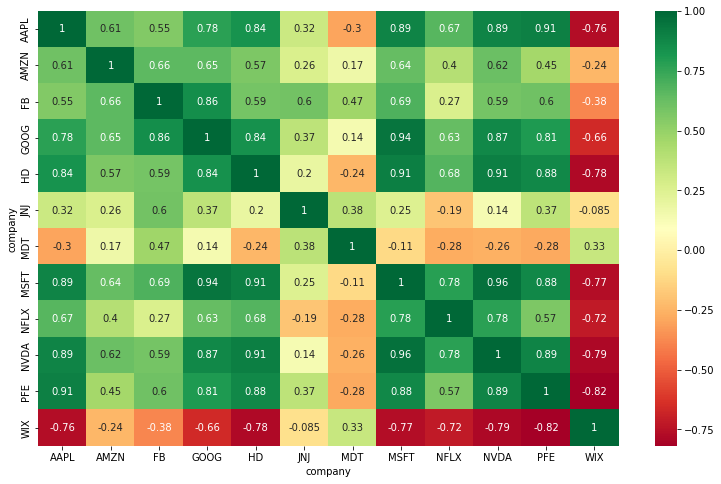

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, cmap="RdYlGn")
plt.figure()

Let’s plot all the stock that we have.

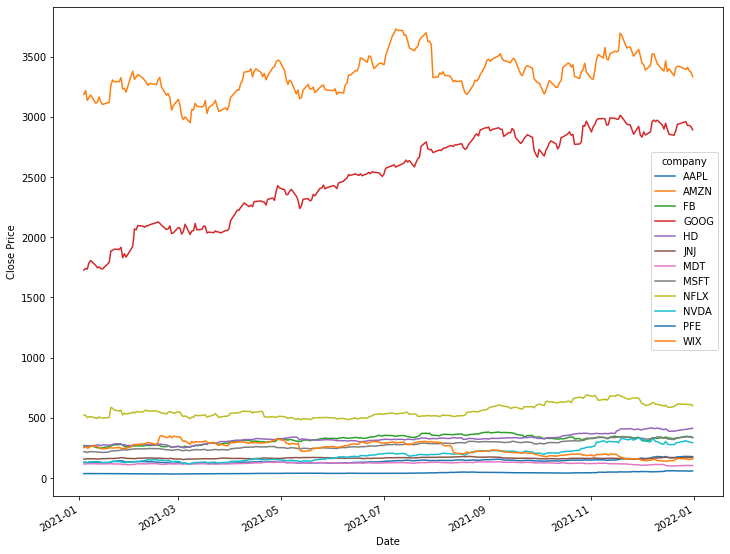

In [ ]:
data_pivot.plot(x='Date',figsize=(12,10))
plt.ylabel('Close Price')
plt.show()

In [26]:
import plotly.express as px
start_date = '01-01-2021'
end_date = '31-12-2021'
date_ranges = (data['Date'] >= start_date) & (data['Date'] <= end_date)
data = data.loc[date_ranges]

px.line(data, x='Date', y='Close', color='company', facet_col='sector')



C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning:

Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



Text(0, 0.5, 'Return From Start Price')

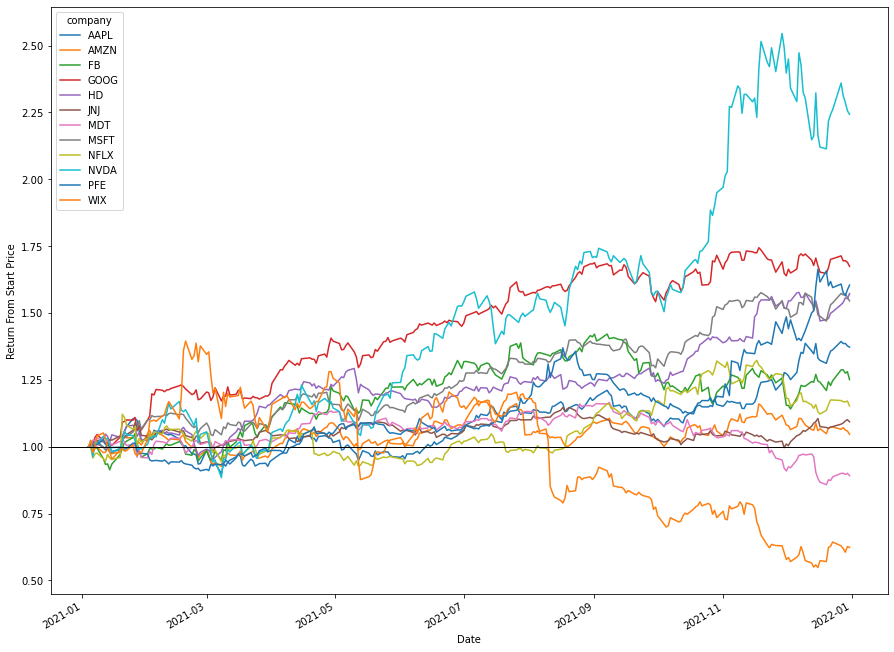

In [ ]:
#Normalising Multiple Stocks
#We divideded all the closing price to the first closing price in the period
data_s=data_pivot.set_index('Date')
returnfstart = data_s.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(15,12)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

**Daily return percentage Plot**

Text(0, 0.5, 'Daily Percentage Return')

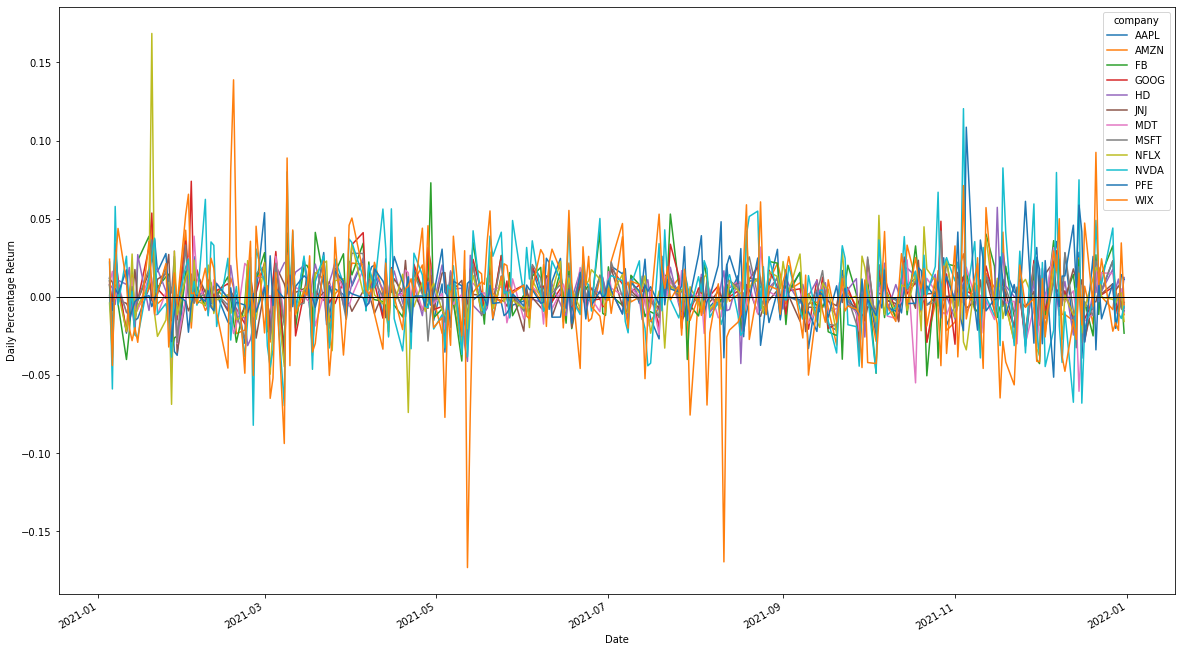

In [ ]:
data_per =data_pivot.set_index('Date')
data_pct = data_per.pct_change()

data_pct.plot(figsize=(20,12))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return')